In [48]:
# set the path and path_img to the folder where the results are stored

path = "/glue-factory/outputs/results/testOG6"

path_img = "/glue-factory/data/minidepth/images/images/"

import cv2

# viualize the results; print 4 images per row
import matplotlib.pyplot as plt
import os
import h5py
import numpy as np

# use os to get the list of files
filelist = []
imagelist = []

for dirpath, dirnames, filenames in os.walk(path):
    #print(f'Found directory: {dirpath}')
    for file_name in filenames:
        path = os.path.join(dirpath, file_name)
        filelist.append(path)
        # get last 4 digits of dirpath
        last4 = dirpath[-4:]
        img_name = file_name[:-4] + 'jpg'
        #img_path = os.path.join(path_img, last4, '/', img_name)
        
        img_path = path_img + last4 + '/' + img_name
        
        imagelist.append(img_path)


print("-----------------")

print(len(filelist))
        


-----------------
9


/tmp/ipykernel_75554/407482066.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 256)


/home/egoedeke/OneDrive/ETH/3DVision/glue-factory/data/minidepth/images/images/5009/00125.jpg


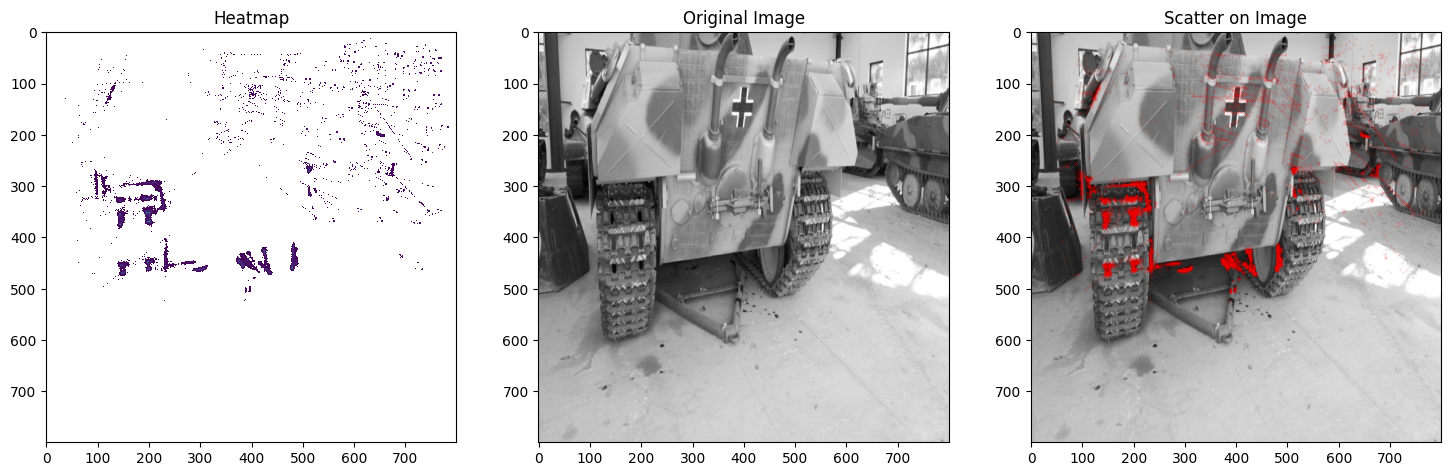

/home/egoedeke/OneDrive/ETH/3DVision/glue-factory/data/minidepth/images/images/0281/245529416_b9ef86cb29_o.jpg


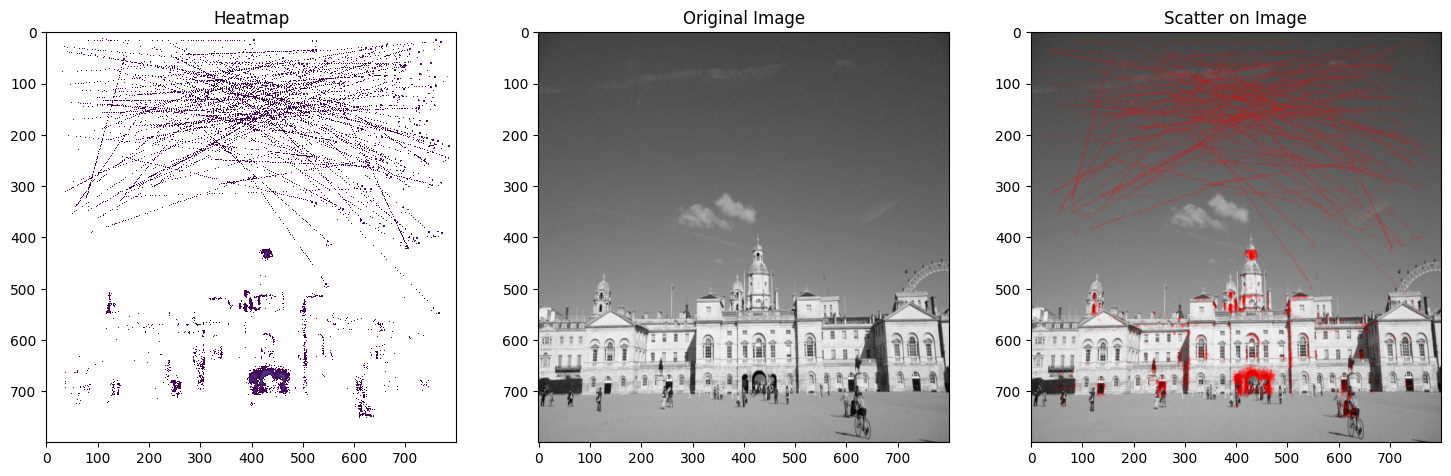

/home/egoedeke/OneDrive/ETH/3DVision/glue-factory/data/minidepth/images/images/0027/2060742334_5da37a41e7_o.jpg


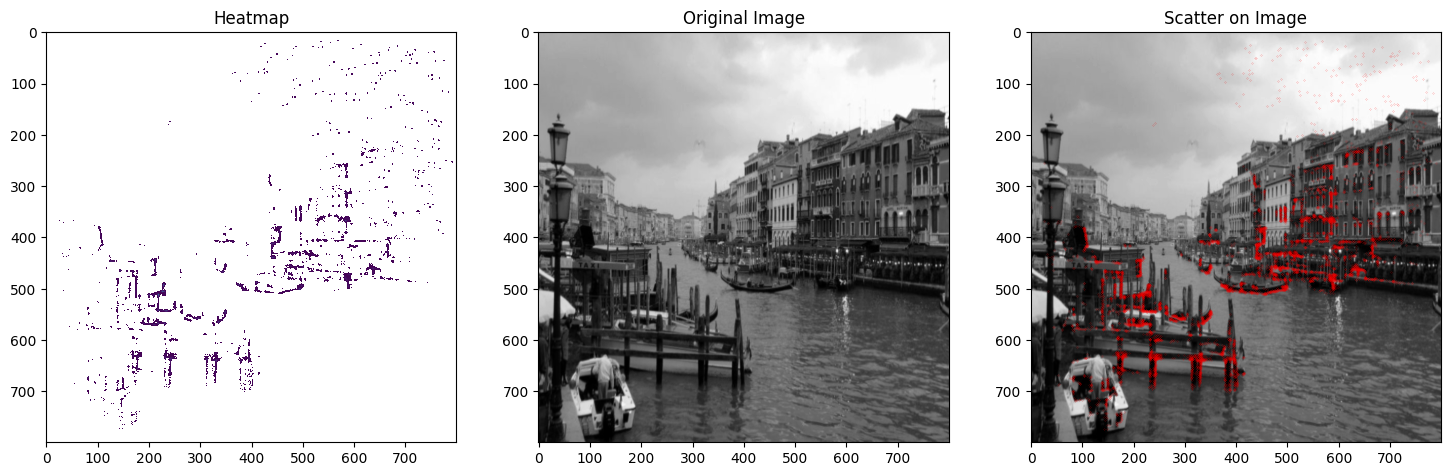

/home/egoedeke/OneDrive/ETH/3DVision/glue-factory/data/minidepth/images/images/0496/1521762232_f463a23867_o.jpg


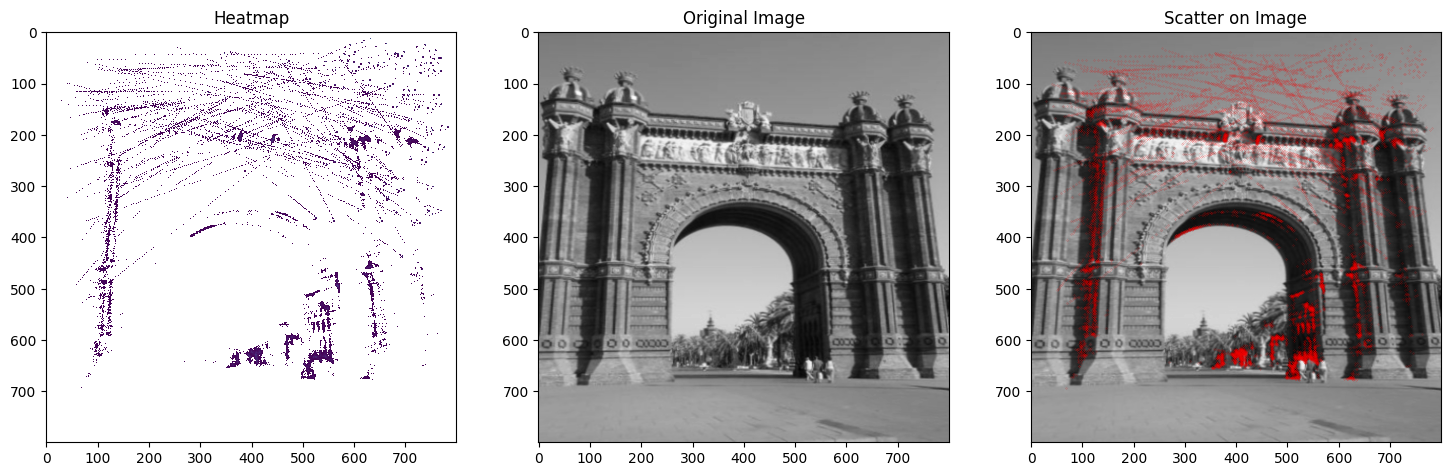

/home/egoedeke/OneDrive/ETH/3DVision/glue-factory/data/minidepth/images/images/0478/5241718189_b3daea1023_b.jpg


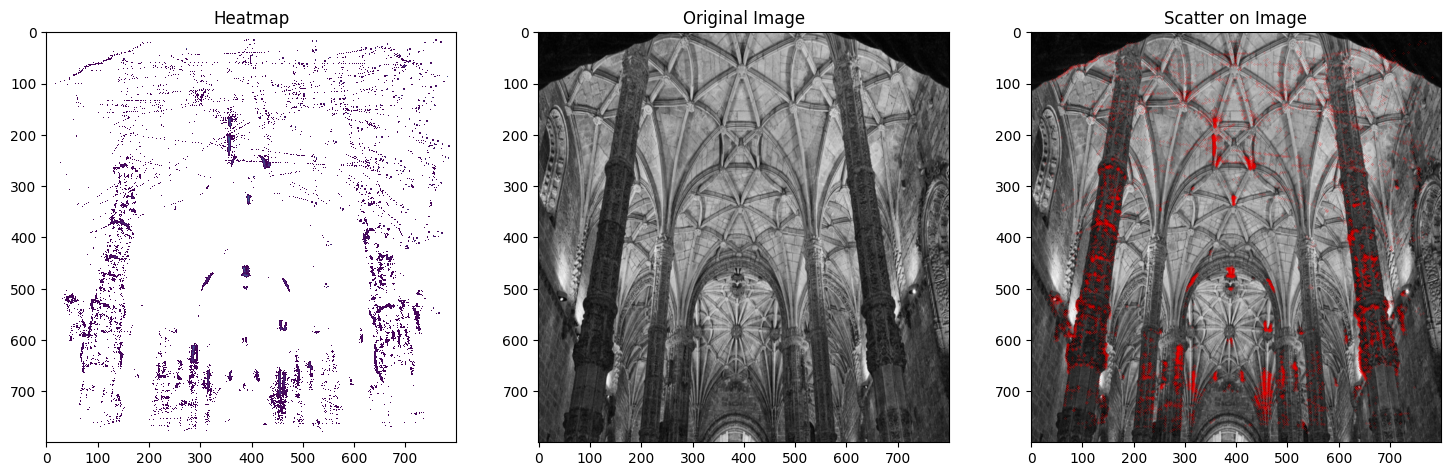

/home/egoedeke/OneDrive/ETH/3DVision/glue-factory/data/minidepth/images/images/0002/2256023656_a1e8f8526e_o.jpg


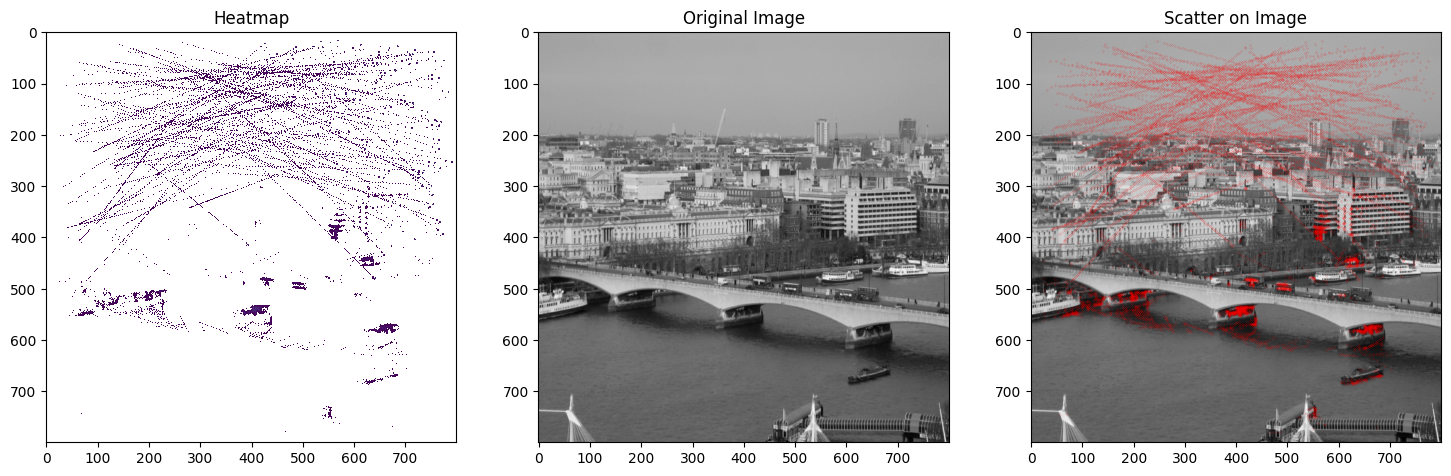

/home/egoedeke/OneDrive/ETH/3DVision/glue-factory/data/minidepth/images/images/0024/3508491346_c627278d01_o.jpg


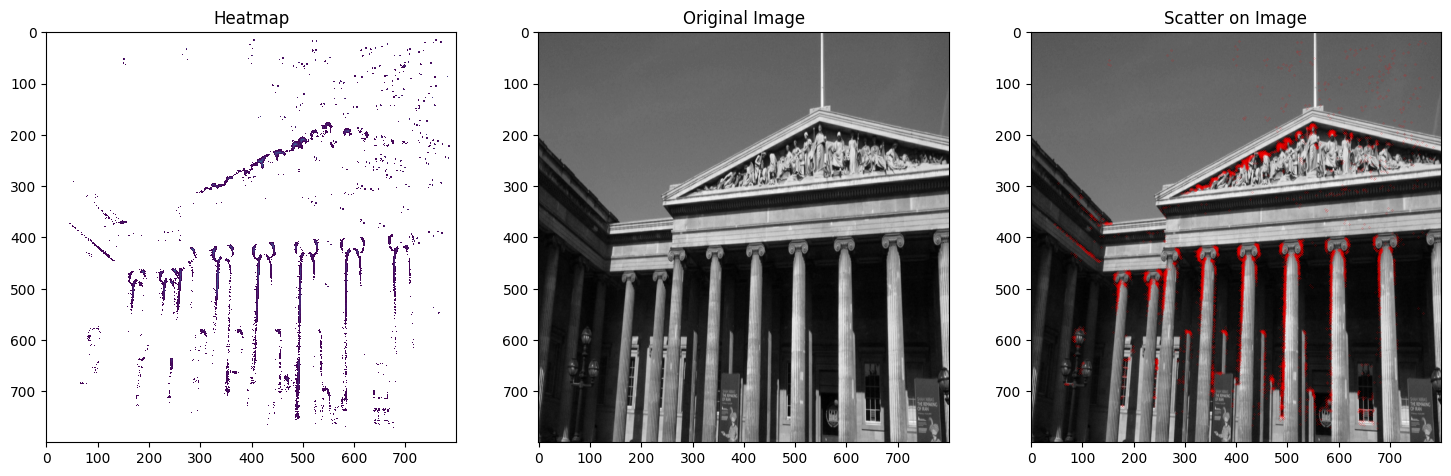

/home/egoedeke/OneDrive/ETH/3DVision/glue-factory/data/minidepth/images/images/0078/1103988914_83122e6f67_o.jpg


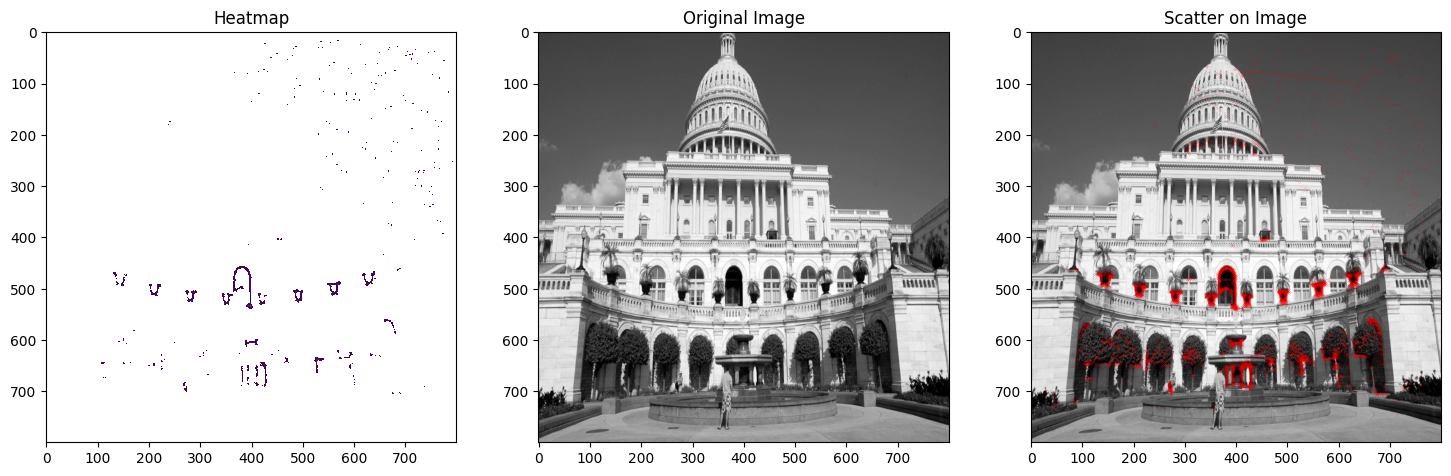

/home/egoedeke/OneDrive/ETH/3DVision/glue-factory/data/minidepth/images/images/0115/8264478156_f8a978773a_o.jpg


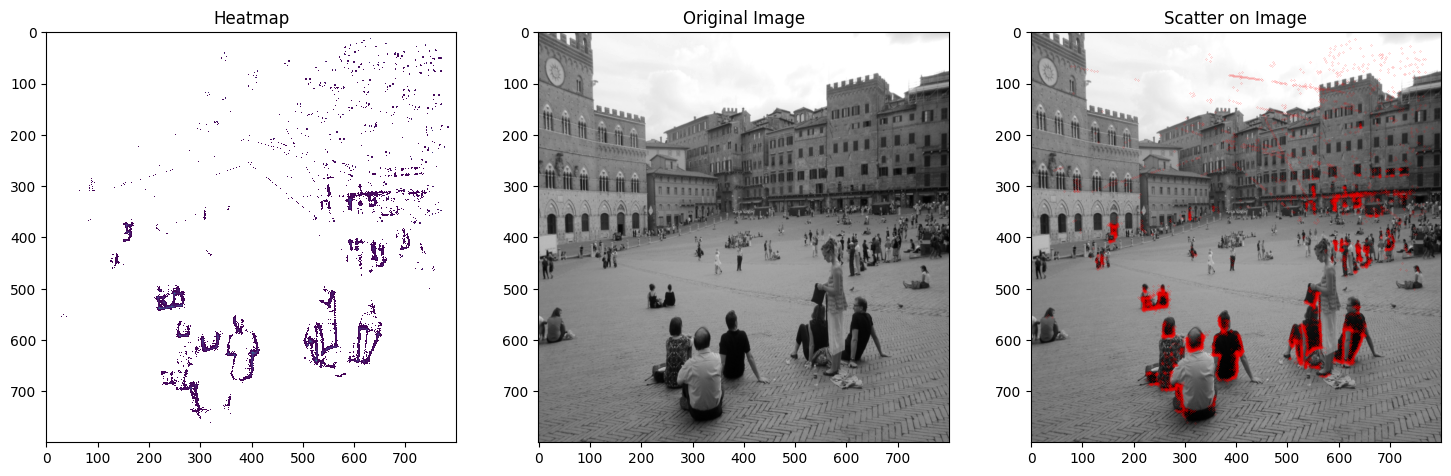

IndexError: list index out of range

In [49]:
import h5py
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


for i in range(0, 10):
    # Open the HDF5 file and read the heatmap
    with h5py.File(filelist[i], 'r') as f:
        heatmap_data = np.array(f['superpoint_heatmap'])

    # Replace NaN values with 0
    heatmap_data = np.nan_to_num(heatmap_data)
    
    # normalise the heatmap by dividing by the maximum value
    heatmap_data = heatmap_data / heatmap_data.max()

    # Calculate the 10th percentile value
    threshold = np.percentile(heatmap_data, 95)
    
    # Find heatmap points above the 10th percentile
    points = np.argwhere(heatmap_data > threshold)
    
    # Read the grayscale image and resize it to match the heatmap
    grayscale_image = cv2.imread(imagelist[i], cv2.IMREAD_GRAYSCALE)
    grayscale_image = cv2.resize(grayscale_image, (800, 800))
    
    heatmap_data_normalized = heatmap_data / np.max(heatmap_data)

    # Get the existing Viridis colormap
    viridis = plt.cm.get_cmap('viridis', 256)

    # Create a new colormap from the Viridis colors
    newcolors = viridis(np.linspace(0, 1, 256))
    white = np.array([1, 1, 1, 1])  # RGBA color for white
    newcolors[0, :] = white  # Set the lowest color to white
    newcmp = ListedColormap(newcolors)
    
    # print path of image
    print(imagelist[i])
    
    # Create a new figure for plotting
    plt.figure(figsize=(18, 6))

    # Plot the original heatmap
    plt.subplot(1, 3, 1)
    plt.imshow(heatmap_data_normalized, cmap=newcmp)
    plt.title('Heatmap')
    
    # Plot the original grayscale image
    plt.subplot(1, 3, 2)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Original Image')

    # Plot the grayscale image with scatter plot of significant heatmap points
    plt.subplot(1, 3, 3)
    plt.imshow(grayscale_image, cmap='gray')
    plt.scatter(points[:, 1], points[:, 0], c='red', s=0.01)  # s is the size of points
    plt.title('Scatter on Image')
    
    # Display the figure with the plots
    plt.show()
